# Future Network Constrained Linear Optimal Power Flow

PyPSA-GB can model the GB power system  by solving a network constrained Linear Optimal Power Flow (LOPF) problem. This notebook shows the example application of a future 3 day period.

In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import cartopy.crs as ccrs

import data_reader_writer_zonetest
import data_reader_writer

D:\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Setting up simulation

Set the required inputs for the LOPF: the start, end and year of simulation, and the timestep.

In [3]:
# write csv files for import
start = '2025-06-04 00:00:00'
end = '2025-06-06 23:30:00'
# year of simulation
year = int(start[0:4])
# time step as fraction of hour
time_step = 1.

Choose from one of the National Grid Future Energy Scenarios.

In [4]:
scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'

Choose a baseline year (from 2010-2020). The baseline year determines which historical load profile and weather dataset is used for the future year modelled. The National Grid FES modellers used 2012 as their baseline year.

In [5]:
year_baseline = 2012

In [6]:
networkmodel = False

data_reader_writer is a script written to read in data from the various sources and write csv files in the format required for populating a PyPSA network object

In [7]:
data_reader_writer_zonetest.data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=2020,
            scenario='Leading The Way', FES=2022, networkmodel=networkmodel)
# data_reader_writer.data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=2020,
#             scenario='Leading The Way', FES=2022)

point (-5.675, 55.779) is not inside any zone, use the nearest zone instead
point (-5.675, 55.779) is not inside any zone, use the nearest zone instead
point (-5.675, 55.779) is not inside any zone, use the nearest zone instead


D:\anaconda3\envs\pypsagb\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
D:\anaconda3\envs\pypsagb\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


In [7]:
network = pypsa.Network()

network.import_from_csv_folder('LOPF_data')
# network.import_from_csv_folder('UC_data')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data has buses, generators, links, loads, storage_units


Lines need to be scaled up to accomadate for future generation, and specific analysis will be done on this in a later notebook.
Note: interconnects are links in future, so don't need to be selective here (as was required in historical simulation).

In [8]:
contingency_factor = 4
network.lines.s_max_pu *= contingency_factor

In [9]:
# # only works in pypsa 0.22 
network.optimize.create_model();

In [11]:
network.model.constraints

linopy.model.Constraints
------------------------

Dimensions:                                (snapshot: 96, Generator-fix: 2453,
                                            Link-fix: 46, StorageUnit-fix: 64,
                                            Bus: 11, Bus-meshed: 19,
                                            StorageUnit: 64)
Coordinates:
  * snapshot                               (snapshot) datetime64[ns] 2025-06-...
  * Generator-fix                          (Generator-fix) object 'West Burto...
  * Link-fix                               (Link-fix) object 'BritNed' ... 'Z...
  * StorageUnit-fix                        (StorageUnit-fix) object 'Dinorwig...
  * Bus                                    (Bus) object 'Belgium' ... 'Z1_1'
  * Bus-meshed                             (Bus-meshed) object 'Z13' ... 'Z1_2'
  * StorageUnit                            (StorageUnit) object 'Dinorwig' .....

Labels:
    Generator-fix-p-lower                  (snapshot, Generator-fix) int32 0 

In [12]:
network.model.constraints['Generator-fix-p-upper']

Constraint `Generator-fix-p-upper` (snapshot: 96, Generator-fix: 2453)
----------------------------------------------------------------------
[2025-06-04 00:00:00, West Burton]:                                        1.0 Generator-p[2025-06-04 00:00:00, West Burton]                                        <= 0.0
[2025-06-04 00:00:00, Heysham 2]:                                          1.0 Generator-p[2025-06-04 00:00:00, Heysham 2]                                          <= 394.96133380631426
[2025-06-04 00:00:00, Torness]:                                            1.0 Generator-p[2025-06-04 00:00:00, Torness]                                            <= 912.5
[2025-06-04 00:00:00, Sizewell B]:                                         1.0 Generator-p[2025-06-04 00:00:00, Sizewell B]                                         <= 381.5836112096488
[2025-06-04 00:00:00, Hywind Scotland Pilot Park (Hywind 2) Demonstrator]: 1.0 Generator-p[2025-06-04 00:00:00, Hywind Scotland Pilot Park (Hyw

In [13]:
network.optimize.solve_model(solver_name="gurobi")

INFO:linopy.model: Solve linear problem using Gurobi solver
Writing variables.: 100%|████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 34.76it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-03
Read LP format model from file C:\Users\Yifan\AppData\Local\Temp\linopy-problem-arv1y6jk.lp


Reading time = 1.08 seconds
obj: 991766 rows, 258336 columns, 1729932 nonzeros
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i9-12900H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 991766 rows, 258336 columns and 1729932 nonzeros
Model fingerprint: 0x952ba84c
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [1e+00, 1e+09]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-06, 1e+09]
Presolve removed 983322 rows and 229536 columns
Presolve time: 0.31s
Presolved: 8444 rows, 29180 columns, 51284 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.05s

Barrier statistics:
 AA' NZ     : 1.634e+04
 Factor NZ  : 2.375e+05 (roughly 17 MB of memory)
 Factor Ops : 1.413e+07 (less than 1 second per iteration)
 Threads    : 12

                  Objective   

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 258336 primals, 991766 duals
Objective: 1.01e+07
Solver model: available
Solver message: 2



('ok', 'optimal')

## Running the optimisation

## Power output by generation type

Group the generators by the carrier, and print their summed power outputs over the simulation period.

In [14]:
p_by_carrier = network.generators_t.p.groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier = network.storage_units_t.p.groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0

p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

if networkmodel == False:
    boundary = pd.read_csv('../data/ZonesBasedGBsystem/network/links.csv')['name'].tolist()
    print(network.links_t.p0)
    imp = network.links_t.p0.copy().drop(columns=boundary)
    imp[imp < 0] = 0
    imp['Interconnectors Import'] = imp.sum(axis=1)
    interconnector_import = imp[['Interconnectors Import']]
    print(interconnector_import)

    p_by_carrier = pd.concat([p_by_carrier, interconnector_import], axis=1)

    exp = network.links_t.p0.copy().drop(columns=boundary)
    exp[exp > 0] = 0
    exp['Interconnectors Export'] = exp.sum(axis=1)
    interconnector_export = exp[['Interconnectors Export']]
    print(interconnector_export)

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

p_by_carrier

Link                 BritNed  EastWest  Moyle  Nemo     IFA         IFA2  \
snapshot                                                                   
2025-06-04 00:00:00      0.0       0.0    0.0   0.0 -2000.0   -36.766600   
2025-06-04 01:00:00      0.0       0.0    0.0   0.0  2000.0   135.102313   
2025-06-04 02:00:00      0.0       0.0    0.0   0.0  2000.0  -134.905582   
2025-06-04 03:00:00      0.0       0.0    0.0   0.0 -2000.0  -157.063873   
2025-06-04 04:00:00      0.0       0.0    0.0   0.0 -2000.0  -176.460400   
...                      ...       ...    ...   ...     ...          ...   
2025-06-07 19:00:00      0.0       0.0    0.0   0.0 -2000.0   342.332996   
2025-06-07 20:00:00      0.0       0.0    0.0   0.0  -400.0  -378.527436   
2025-06-07 21:00:00      0.0       0.0    0.0   0.0  -400.0  -983.447684   
2025-06-07 22:00:00      0.0       0.0    0.0   0.0  -400.0 -1000.000000   
2025-06-07 23:00:00      0.0       0.0    0.0   0.0  2000.0 -1000.000000   

Link       

,Biomass (co-firing),Biomass (dedicated),CCS Biomass,CCS Gas,Coal,Hydrogen,Hydro,Natural Gas,Nuclear,Oil,...,Waste,Wave power,Wind Offshore,Wind Onshore,Battery,Compressed Air,Liquid Air,Pumped Storage Hydroelectric,Interconnectors Import,Biomass
snapshot,,,,,,,,,,,,,,,,,,,,,
2025-06-04 00:00:00,0.000,0.000000,0.0,0.0,0.0,0.0,186.160609,0.000000,2092.814182,0.0,...,0.0,1.98405,13594.315369,2292.238375,3598.790644,0.000000,0.000000,300.000000,2675.671046,0.000000
2025-06-04 01:00:00,0.000,0.000000,0.0,0.0,0.0,0.0,138.765386,0.000000,2151.800000,0.0,...,0.0,1.98405,13716.719909,2271.687930,0.000000,0.000000,0.000000,61.234507,3230.478535,0.000000
2025-06-04 02:00:00,0.000,0.000000,0.0,0.0,0.0,0.0,138.765386,0.000000,2263.100000,0.0,...,0.0,1.98405,13964.348393,2288.549495,0.000000,0.000000,0.000000,170.966590,3534.905582,0.000000
2025-06-04 03:00:00,0.000,0.000000,0.0,0.0,0.0,0.0,134.856505,0.000000,2374.400000,0.0,...,0.0,1.98405,14071.381750,2267.006689,0.000000,0.000000,0.000000,300.000000,3557.063873,0.000000
2025-06-04 04:00:00,0.000,0.000000,0.0,0.0,0.0,0.0,133.879283,0.000000,2485.700000,0.0,...,0.0,2.48400,14549.007427,2155.168414,0.000000,0.000000,0.000000,0.000000,2342.578632,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-07 19:00:00,516.256,3135.130998,0.0,0.0,0.0,0.0,566.299596,5767.725598,2670.800000,0.0,...,0.0,1.30005,15449.213451,4184.234966,1952.835899,2.739001,32.485023,2556.736527,3742.332996,3651.386998
2025-06-07 20:00:00,516.256,3135.130998,0.0,0.0,0.0,0.0,445.124181,5012.065580,2708.300000,0.0,...,0.0,1.30005,14769.271619,3787.140617,5323.683015,1.485000,43.176202,1788.556380,1801.700961,3651.386998
2025-06-07 21:00:00,516.256,3135.130998,0.0,0.0,0.0,0.0,396.751742,9308.149903,2708.300000,0.0,...,0.0,1.30005,14220.408457,3317.446881,341.523224,1.003201,29.662211,2398.482759,3783.447684,3651.386998


Graph the power output of the different generation types...

D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1437: UserWarning:

Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.



Text(0.5, 0, '')

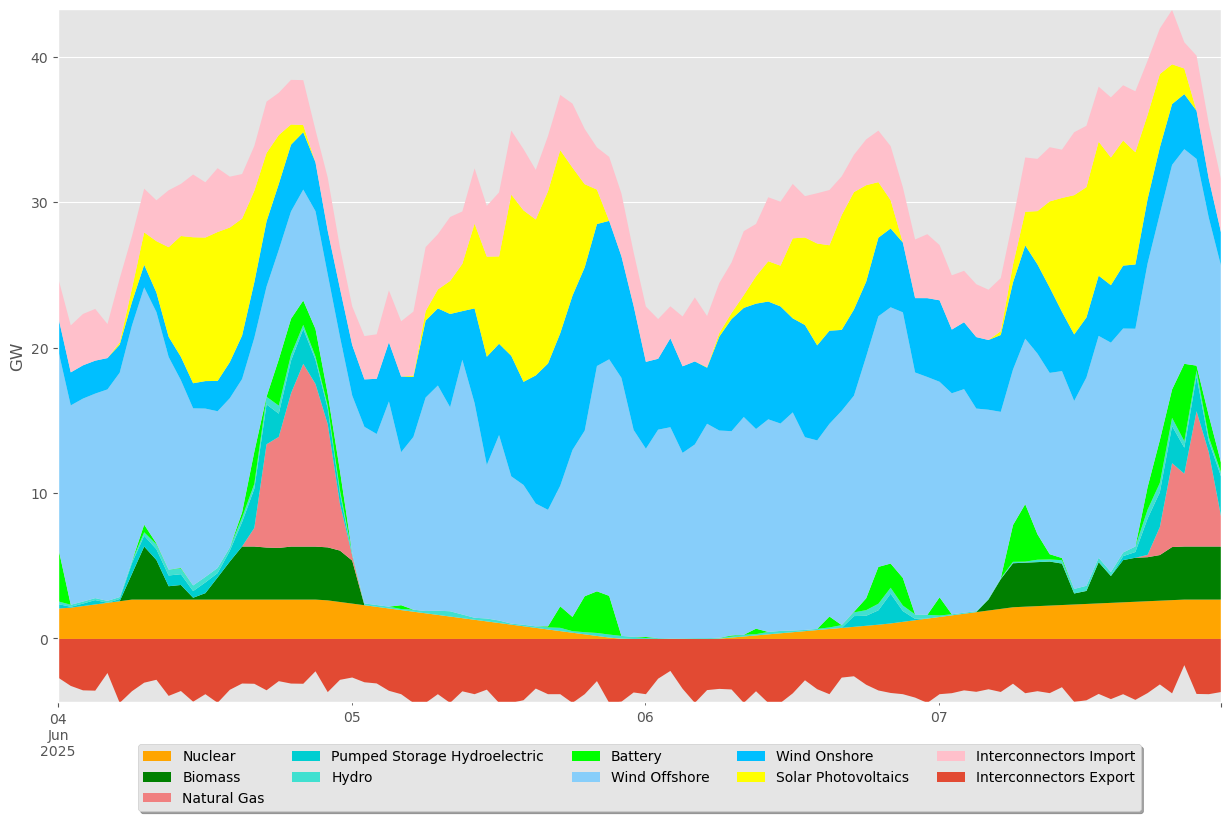

In [15]:
cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Interconnectors Import', 'Unmet Load'
        ]

p_by_carrier = p_by_carrier[cols]

p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)


colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'black',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "lightcoral",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
(interconnector_export / 1e3).plot.area(ax=ax, stacked=True, linewidth=0.)
# rescale the y axis
ax.set_ylim([(interconnector_export / 1e3).sum(axis=1).min(), (p_by_carrier / 1e3).sum(axis=1).max()])

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("GW")

ax.set_xlabel("")

## Plotting storage

Graph the pumped hydro dispatch and state of charge...

Text(0.5, 0, '')

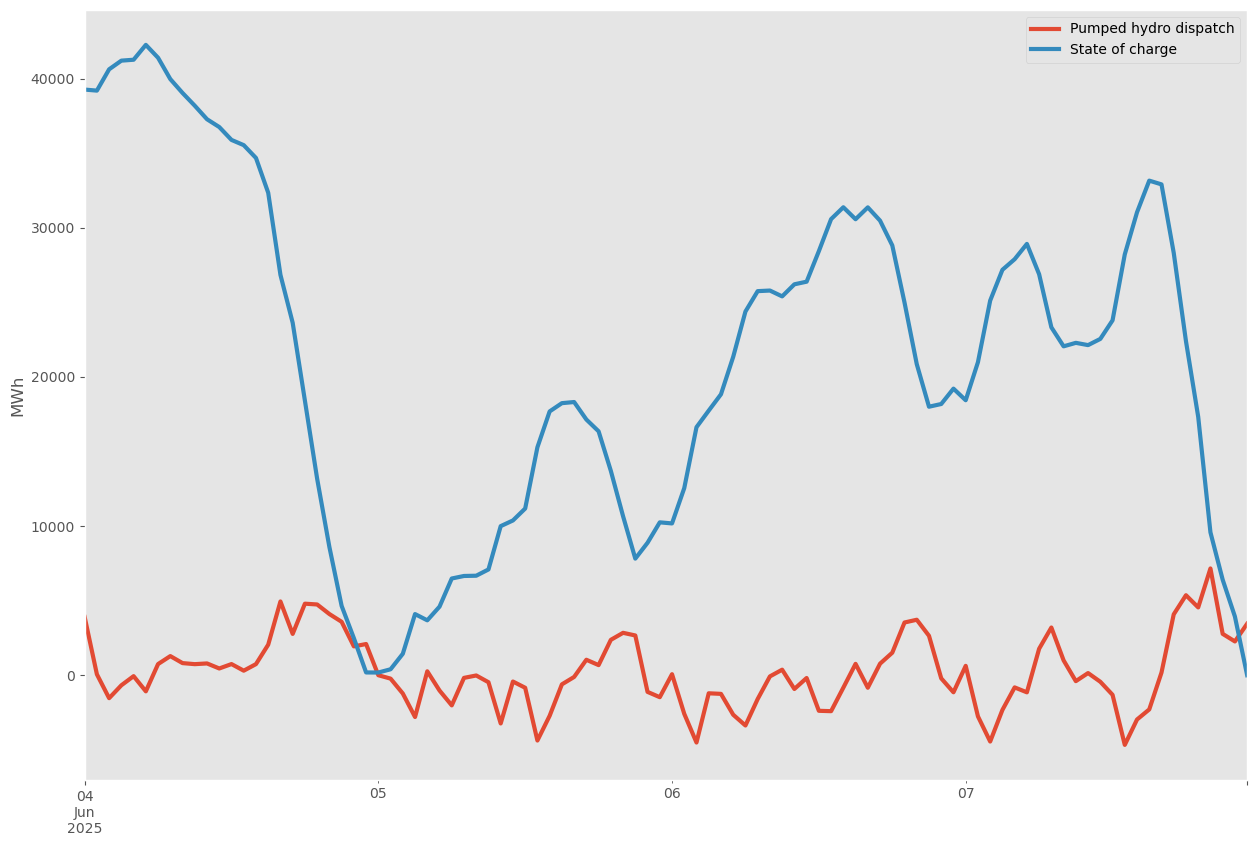

In [16]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = network.storage_units_t.p.sum(axis=1)
state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="Pumped hydro dispatch", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

## Plotting curtailment

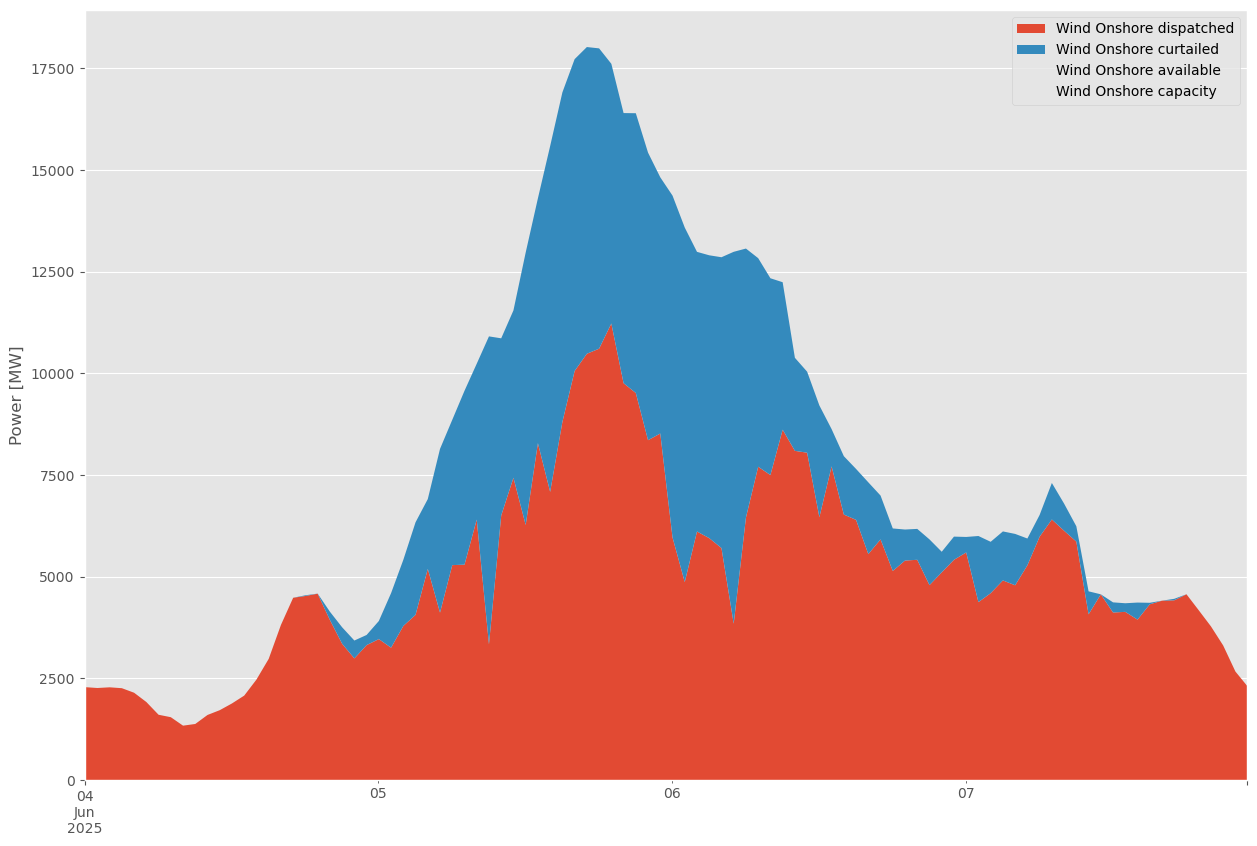

In [37]:
carrier = "Wind Onshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Onshore curtailed"][p_df["Wind Onshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)
p_df[[carrier + " available", carrier + " capacity"]].plot(ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()